In [1]:
# Import required libraries for EDA and Data Preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from scipy import stats

# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Assign a global random seed to allow for reproducible results
# If a global random seed isn't assigned, a random_state would need to be assigned to each random number
# generation or selector in the algorithm
np.random.seed(42)

In [3]:
# Link: https://www.kaggle.com/blastchar/telco-customer-churn
# Read the dataset
df = pd.read_csv('TelecomChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the shape of the dataset and confirm that there are no duplicate customers in the dataset
print(df.shape)
print(df.customerID.unique().shape)

(7043, 21)
(7043,)


In [5]:
# Check if null values exist in any of the columns
(df.astype(np.object).isnull()).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
# Remove ID column as it is not required
del df['customerID']

In [7]:
# Check the column data types to check which columns don't have the correct data type
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# TotalCharges column contained spaces as null values causing the type to be an Object rather than a number
df[df.TotalCharges == " "].shape[0]

11

In [9]:
# Replace the spaces to 0 using Pandas replace function since TotalCharges is blank for new customers
df['TotalCharges'] = df["TotalCharges"].replace(" ", "0")

In [10]:
# Since the spaces have been dealt with, the data type of TotalCharges can be changed to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [11]:
# Convert SeniorCitizen to a categorical column for visualization purposes
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes", 0:"No"})

In [12]:
# Check the column data types to confirm that issues like TotalCharges don't exist anywhere else
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# Check the balance of the dataset
# This dataset is unbalanced and will have to be dealt with in different ways
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
# Break up the datasets for visualization purposes
df_churn = df[df['Churn'] == "Yes"]
df_notchurn = df[df['Churn'] == "No"]

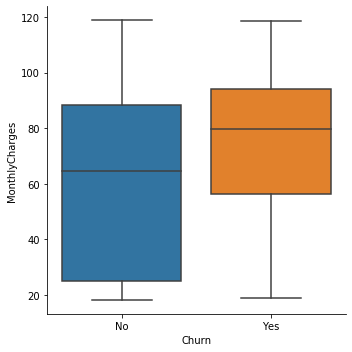

In [15]:
# Look at the difference in MonthlyCharges for Churn
# Customers that have left have a higher monthly charge
sns.factorplot(x = 'Churn', y = 'MonthlyCharges', data = df,  kind="box")

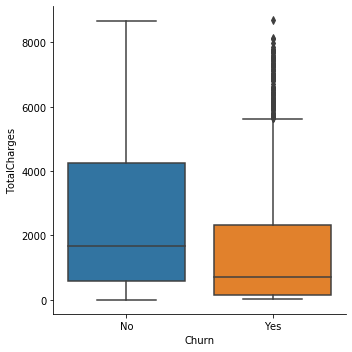

In [16]:
# Look at the difference in TotalCharges for Churn
# Customers that have left have a lower total charges, implying they didn't stay with the company too long
# Some customers that have left have higher total charges, could be due to reasons unrelated to the service
sns.factorplot(x = 'Churn', y = 'TotalCharges', data = df,  kind="box")

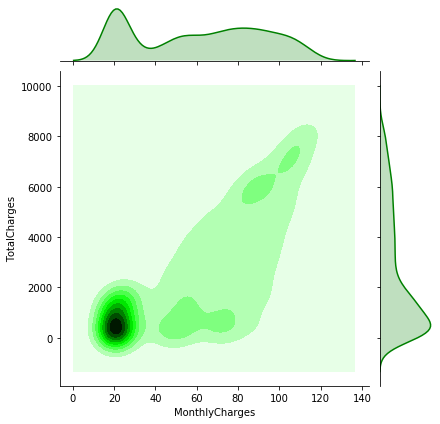

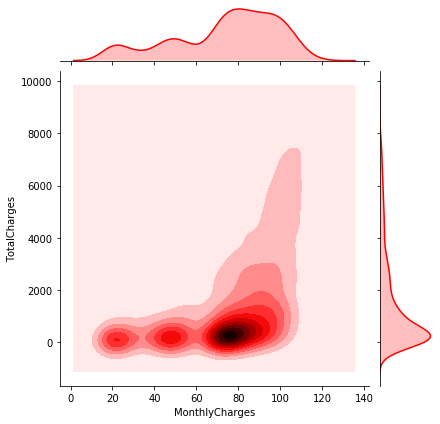

In [17]:
# Look at the distribution and spread of MonthlyCharges and TotalCharges for customers
# In most cases lower monthly helps retain customers 
sns.jointplot(x = "MonthlyCharges", y = "TotalCharges", data = df_notchurn, color = "g", kind = "kde")
sns.jointplot(x = "MonthlyCharges", y = "TotalCharges", data = df_churn, color = "r", kind = "kde")

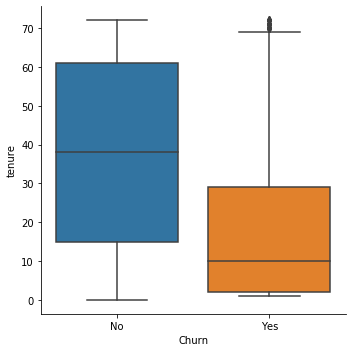

In [18]:
# The company has many loyal customers that have stayed with the company for many years
# Some customers with a high tenure have left the company, this could be due to incidents not related to the service
sns.factorplot(x = 'Churn', y = 'tenure', data = df,  kind="box")

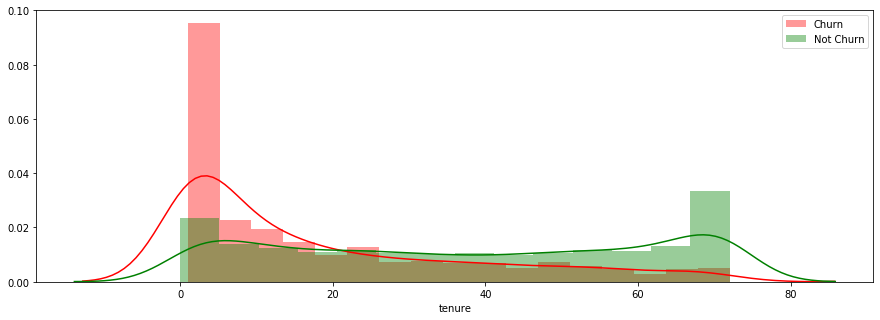

In [19]:
# Company tends to lose most of customers early on and is able to retain them in the long term
plt.figure(figsize=(15, 5))
sns.distplot(df_churn['tenure'], color = "r", label = "Churn")
sns.distplot(df_notchurn['tenure'], color = "g", label = "Not Churn")
plt.legend()

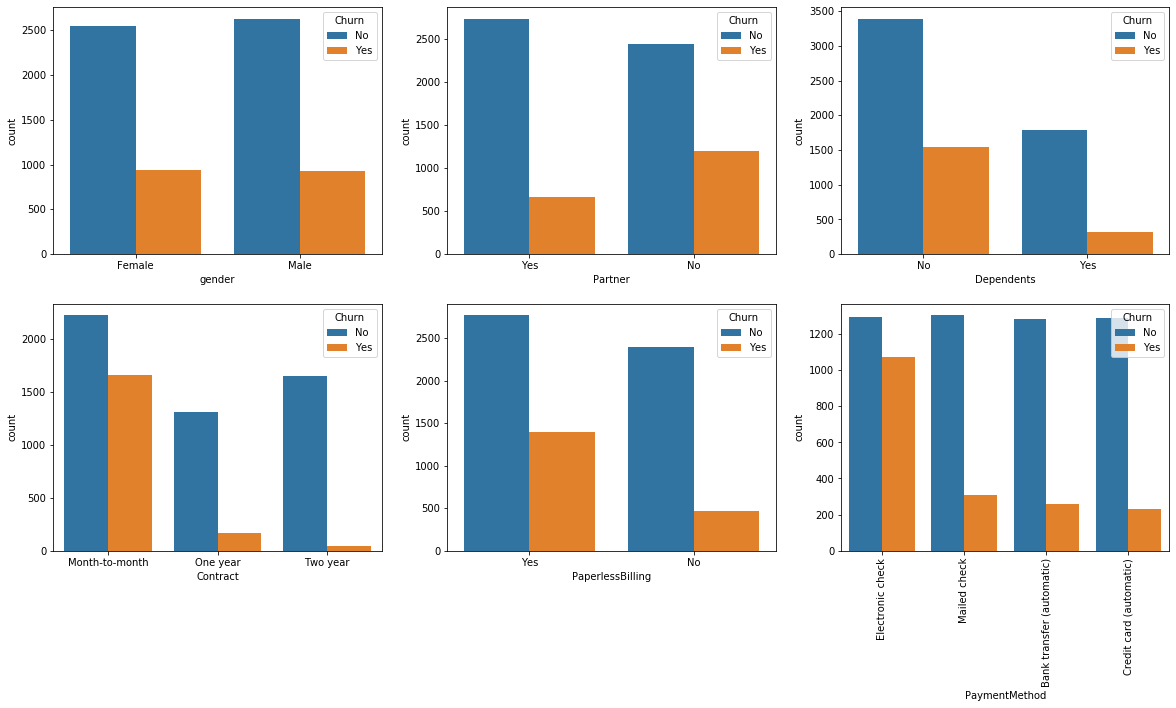

In [20]:
# Check reasons for churning across customer demographics
fig, axes = plt.subplots(nrows = 2,ncols = 3,figsize = (20,10))
sns.countplot(x = "gender", hue = 'Churn', data = df, ax=axes[0][0])
sns.countplot(x = "Partner", hue = 'Churn', data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", hue = 'Churn', data = df, ax=axes[0][2])
sns.countplot(x = "Contract", hue = 'Churn', data = df, ax=axes[1][0])
sns.countplot(x = "PaperlessBilling", hue = 'Churn', data = df, ax=axes[1][1])
ax = sns.countplot(x = "PaymentMethod", hue = 'Churn', data = df, ax=axes[1][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

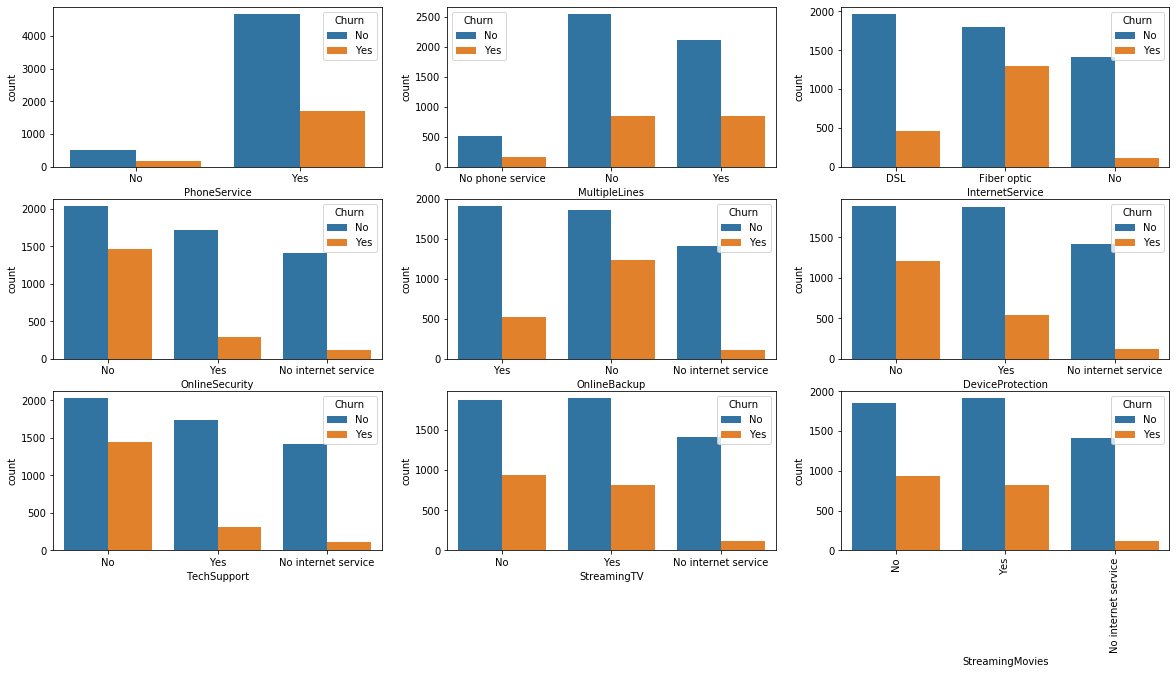

In [21]:
# Check reasons for churning across services customer has subscribed to
fig, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (20,10))
sns.countplot(x = "PhoneService", hue = 'Churn', data = df, ax=axes[0][0])
sns.countplot(x = "MultipleLines", hue = 'Churn', data = df, ax=axes[0][1])
sns.countplot(x = "InternetService", hue = 'Churn', data = df, ax=axes[0][2])
sns.countplot(x = "OnlineSecurity", hue = 'Churn', data = df, ax=axes[1][0])
sns.countplot(x = "OnlineBackup", hue = 'Churn', data = df, ax=axes[1][1])
sns.countplot(x = "DeviceProtection", hue = 'Churn', data = df, ax=axes[1][2])
sns.countplot(x = "TechSupport", hue = 'Churn', data = df, ax=axes[2][0])
sns.countplot(x = "StreamingTV", hue = 'Churn', data = df, ax=axes[2][1])
ax = sns.countplot(x = "StreamingMovies", hue = 'Churn', data = df, ax=axes[2][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

In [22]:
# Create a feature with the number of internet services a customer has subscribed to
def count_internet_services(row):
    internet_services_cols = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
    count = 0
    for col in internet_services_cols:
        if row[col] == "Yes":
            count += 1
    return count

# Apply the created function to the dataframe
df["NumInternetServices"] = df.apply(count_internet_services, axis = 1)

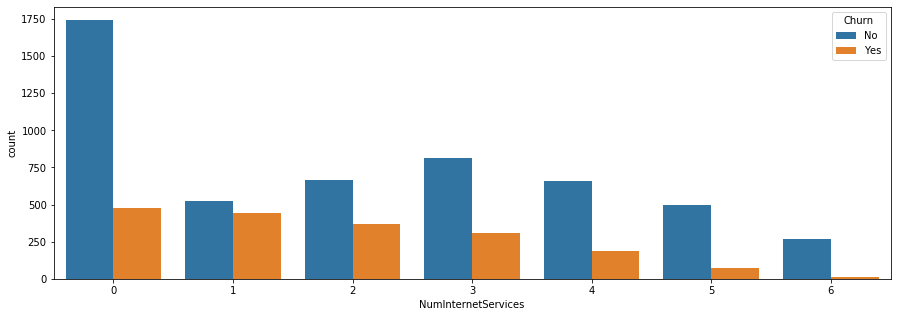

In [23]:
# Check if the number of internet services is a useful
# There seems to be a difference in % of customers that left when they have more services
plt.figure(figsize=(15, 5))
sns.countplot(x = "NumInternetServices", hue = 'Churn', data = df)

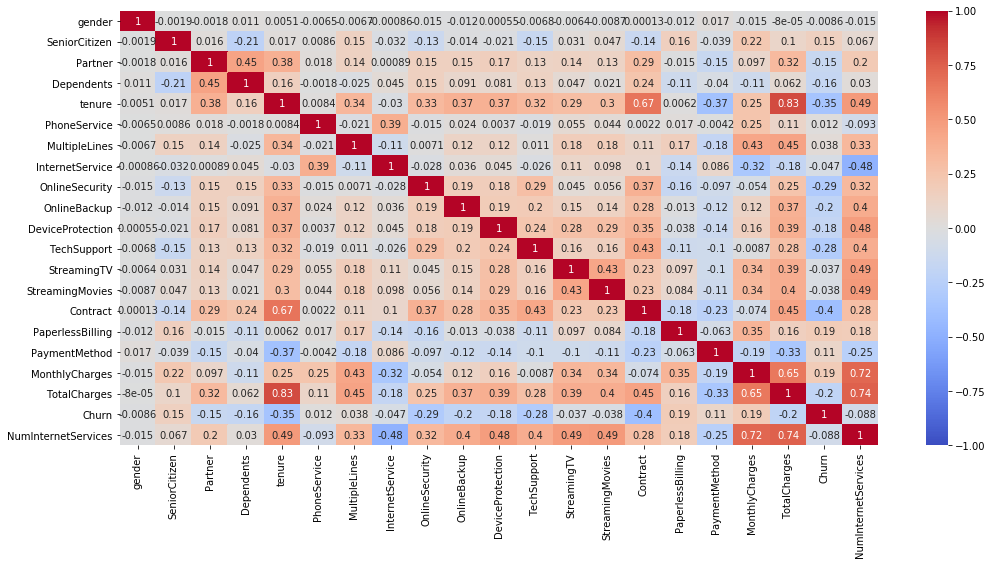

In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Create an ordinal encoder and apply it to the dataframe
df_corr = df.copy()
encoder = OrdinalEncoder()
for col in df_corr.columns:
    if df[col].dtype == 'object':
        x = df_corr[col].values.reshape(-1, 1)
        df_corr[col] = encoder.fit_transform(x)
        
# Create a correlation heatmap to check correlation between all features
plt.figure(figsize=(17, 8))
sns.heatmap(df_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [25]:
# Check the number of unique values in all columns
for col in df.columns:
    count = df[col].unique().shape[0]
    print(col + ': ' + str(count))

gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2
NumInternetServices: 7


In [26]:
# Column header for the label
label = ['Churn']

In [27]:
# Column headers for categorical features
cat = []
for col in df.columns:
    if (df[col].dtype == 'object') & (col != 'Churn'):
        cat.append(col)

In [28]:
# Column headers for numerical features
num = []
for col in df.columns:
    if (col not in cat) & (col not in label):
        num.append(col)

In [29]:
from sklearn import preprocessing
    
# Apply MinMaxScaler to the numerical features
# MinMaxScaler was chosen as it rescales the data set such that all feature values are in the range [0, 1]
# This method is sensitive to outliers like the StandardScaler
for col in num:
    x = df[col].values.reshape(-1, 1)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df[col] = pd.DataFrame(x_scaled)

In [30]:
# Apply OneHotEncoding using the Pandas get_dummies function
df = pd.get_dummies(df, columns = cat)

In [31]:
# Replace Churn with 1 and 0, ordinal encoder for the churn column
df['Churn'] = df['Churn'].replace({"Yes":1, "No":0})

In [32]:
# Make sure all columns have been transformed as expected
df

,tenure,MonthlyCharges,TotalCharges,Churn,NumInternetServices,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,0,0.166667,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,0.333333,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,1,0.333333,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,0.500000,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,0.000000,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0.229194,0,0.833333,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,1.000000,0.845274,0.847792,0,0.666667,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,0.152778,0.112935,0.039892,0,0.166667,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
7041,0.055556,0.558706,0.035303,1,0.000000,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [33]:
# Create a numpy array of the Churn column, the label or Y
label = np.array(df['Churn'])

In [34]:
# Create a numpy array of all columns except Churn, the features or X
features = np.array(df.drop(['Churn'], axis = 1))

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Create a train test split using 25% of the data
# Stratify the dataset to account for the unbalanced dataset
# Stratified random sampling accurately reflects the population
# It ensures each group receives proper representation within the sample
X_train, X_test, y_train, y_test = train_test_split(features, label, stratify = label, test_size=0.25)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [39]:
# Create a list of classifiers to be tested with the dataset
classifiers = [['DecisionTree:',DecisionTreeClassifier()],
               ['RandomForest:',RandomForestClassifier()], 
               ['Naive Bayes:', GaussianNB()],
               ['KNeighbours:', KNeighborsClassifier()],
               ['SVM:', SVC()],
               ['LogisticRegression:', LogisticRegression()],
               ['ExtraTreesClassifier:', ExtraTreesClassifier()],
               ['AdaBoostClassifier:', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB:', XGBClassifier()]]

# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

# Loop through all classifiers, train, test, and validate the classifier
for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average = 'weighted')
    cv_score = cross_val_score(classifier, X_test, y_test, cv=10)
    scores_df = pd.DataFrame([[name.strip(" :"), accuracy, cv_score.mean(), precision, recall, f1]])
    metrics_df = metrics_df.append(scores_df)
    
# Clean up the metrics dataframe and display
# Logistic regressions is the best model using stratification with the highest cross-validated accuracy
# and F1 score
metrics_df.columns = ['Classifier', 'Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df

,Classifier,Accuracy,CV Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.737081,0.728040,0.504464,0.483940,0.735310
0,RandomForest,0.787053,0.770618,0.630682,0.475375,0.776632
0,Naive Bayes,0.695627,0.695657,0.459459,0.837259,0.713452
0,KNeighbours,0.747871,0.763787,0.523810,0.541756,0.749209
0,SVM,0.793299,0.785933,0.641096,0.501071,0.784548
0,LogisticRegression,0.800681,0.797287,0.648718,0.541756,0.794607
0,ExtraTreesClassifier,0.775128,0.765501,0.594667,0.477516,0.766702
0,AdaBoostClassifier,0.795571,0.787609,0.644986,0.509636,0.787318
0,GradientBoostingClassifier,0.796139,0.796726,0.652542,0.494647,0.786374
0,XGB,0.778535,0.774008,0.600000,0.494647,0.771278


In [40]:
# Check feature importance using the XGB trained algorithm from the previous cell
# This can be used to select features or reduce features to reduce cost of running the model
# with a minimal decrese in evaluation metrics
importance = classifier.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item : item[1], reverse = True)}

importance

{'f18': 86.567687514325,
 'f38': 67.13305684065385,
 'f40': 4.8604843249,
 'f20': 4.3591522015777775,
 'f29': 3.8136763167608683,
 'f17': 3.1953464165,
 'f37': 2.968318748181818,
 'f0': 2.8895688470560024,
 'f39': 2.3606020318947367,
 'f25': 2.1998451020000003,
 'f14': 2.121695783068572,
 'f41': 2.046170359431429,
 'f45': 1.9672435040295162,
 'f12': 1.9639313942500003,
 'f22': 1.94413086875,
 'f23': 1.8894129598775007,
 'f2': 1.7714171581274656,
 'f1': 1.768132546684507,
 'f6': 1.763749941121951,
 'f26': 1.7626981733124998,
 'f3': 1.6324602990381576,
 'f35': 1.629736796666666,
 'f44': 1.5505982214774192,
 'f31': 1.4787344029999998,
 'f16': 1.3878753419499996,
 'f8': 1.373289138,
 'f46': 1.3713767336969696,
 'f10': 1.3658148342978722,
 'f43': 1.3456993962707315,
 'f4': 1.3420235797125,
 'f28': 1.2775744546428573,
 'f32': 1.099258526203333,
 'f34': 0.989440248}

In [41]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to resample (oversample) the dataset since it is a small dataset
# If this was a large dataset, undersampling would make more sense
# The Synthetic Minority Over-sampling TEchnique is an approach that creates synthetic minority class samples
features_resampled, label_resampled = SMOTE().fit_resample(features, label)

In [42]:
# Create a train test split using 25% of the data
# Continue stratifying, not necessary
X_train, X_test, y_train, y_test = train_test_split(features_resampled, label_resampled, stratify = label_resampled, test_size=0.25)

In [43]:
# Create a list of classifiers to be tested with the dataset
classifiers = [['DecisionTree:',DecisionTreeClassifier()],
               ['RandomForest:',RandomForestClassifier()], 
               ['Naive Bayes:', GaussianNB()],
               ['KNeighbours:', KNeighborsClassifier()],
               ['SVM:', SVC()],
               ['LogisticRegression:', LogisticRegression()],
               ['ExtraTreesClassifier:', ExtraTreesClassifier()],
               ['AdaBoostClassifier:', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB:', XGBClassifier()]]

# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

# Loop through all classifiers, train, test, and validate the classifier
for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average = 'weighted')
    cv_score = cross_val_score(classifier, X_test, y_test, cv=10)
    scores_df = pd.DataFrame([[name.strip(" :"), accuracy, cv_score.mean(), precision, recall, f1]])
    metrics_df = metrics_df.append(scores_df)
    
# Clean up the metrics dataframe and display
# XGBoost is the best model using oversampling with the highest cross-validated accuracy
# and F1 score
metrics_df.columns = ['Classifier', 'Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df

,Classifier,Accuracy,CV Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.792810,0.738329,0.784108,0.808346,0.792759
0,RandomForest,0.849633,0.805585,0.838444,0.866306,0.849590
0,Naive Bayes,0.746424,0.749132,0.708225,0.838485,0.744251
0,KNeighbours,0.781214,0.732136,0.728643,0.896445,0.778261
0,SVM,0.800541,0.777745,0.768276,0.860896,0.799809
0,LogisticRegression,0.772323,0.766517,0.750177,0.816847,0.771868
0,ExtraTreesClassifier,0.851179,0.800168,0.834437,0.876352,0.851084
0,AdaBoostClassifier,0.808659,0.802861,0.777623,0.864760,0.808051
0,GradientBoostingClassifier,0.833398,0.823738,0.809319,0.872488,0.833141
0,XGB,0.850019,0.821794,0.840090,0.864760,0.849986


In [44]:
from sklearn.metrics import classification_report

# Create a classification report to use as a baseline prior to hyperparameter tuning
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
predictions_df[name.strip(" :")] = predictions
target_names = ['Not Churn', 'Churn']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

   Not Churn       0.86      0.84      0.85      1293
       Churn       0.84      0.86      0.85      1294

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



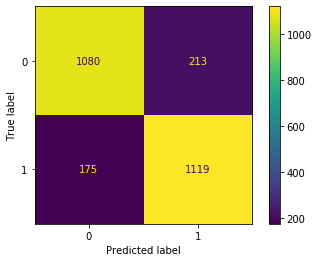

In [45]:
from sklearn.metrics import plot_confusion_matrix

# Create a confusion matrix to identify true and false positives to use as a baseline prior to hyperparameter tuning
plot_confusion_matrix(classifier, X_test, y_test)

plt.show()

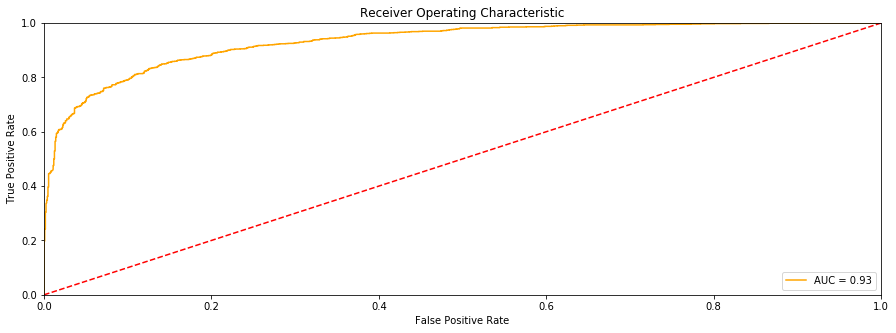

In [46]:
probabilities = classifier.predict_proba(X_test)

from sklearn.metrics import roc_curve, auc

def plot_auc(labels, probs):
    fpr, tpr, threshold = roc_curve(labels, probs[:,1])
    auc_score = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc_score)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Create a ROC curve to visualize true vs. false positive rates
# The higher the spike near the y-axis, the better the model
plt.figure(figsize=(15, 5))    
plot_auc(y_test, probabilities)  

In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Set up dictionary of parameters to be used for hyperparameter tuning
param_test = {
    'max_depth' : range(1, 15, 2),
    'min_child_weight' : range(1, 20, 2),
    'gamma' : [i / 10.0 for i in range(0, 10)],
    'subsample' : [i / 10.0 for i in range(1,10)],
    'colsample_bytree' : [i / 10.0 for i in range(1,10)],
    'colsample_bylevel' : [i / 10.0 for i in range(1,10)],
    'n_estimators' : range(100, 300, 50),
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
    }

# The param_test dictionary consists of too many combinations of parameters
# so RandomizedSearchCV is used as it allows for the identification of number of iterations 
# 3 cross-validations are used with n_jobs as -1 forces the use of all available processors
# Random_state is assigned again in case and the scoring metric used is accuracy
search = RandomizedSearchCV(estimator = XGBClassifier(), param_distributions = param_test, n_iter = 2000,
                            scoring = 'accuracy', verbose = 2, n_jobs = -1, cv = 3, random_state = 42)

search.fit(X_train, y_train)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 49.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                   

In [48]:
# Check the best parameters produced by the RandomizedSearchCV
search.best_params_, search.best_score_

({'subsample': 0.9,
  'n_estimators': 200,
  'min_child_weight': 1,
  'max_depth': 3,
  'learning_rate': 0.3,
  'gamma': 0.8,
  'colsample_bytree': 0.2,
  'colsample_bylevel': 0.5},
 0.8531117124081948)

In [49]:
# Re-train the XGBoost classifier using the oversampled dataset and the identified hyperparameters
classifier = XGBClassifier(n_estimators = 200, learning_rate = 0.3, max_depth = 3, min_child_weight = 1, 
                           gamma = 0.8, colsample_bytree = 0.2, colsample_bylevel = 0.5, subsample = 0.9)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
predictions_df[name.strip(" :")] = predictions
target_names = ['Not Churn', 'Churn']

# Create a classification report to compare hyperparameter tuned model
# The recall has decreased for customers that have not churned
# There is an improvement through:
#    The CV Accuracy for XGBoost was 82.18%, and the CV Accuracy for the tuned model is 85.31%
#    The random_state made more of a difference to the accuracy prior to hyperparameter tuning
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

   Not Churn       0.86      0.84      0.85      1293
       Churn       0.84      0.86      0.85      1294

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



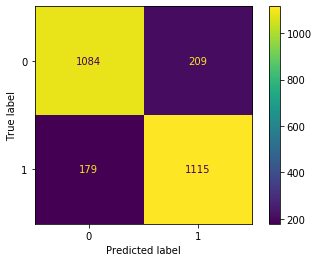

In [50]:
# Trade off of false negatives and false positives post hyperparameter tuning
# RandomizedGridCV can be used to optimize on precision, recall, and F1 score as well based on requirements
plot_confusion_matrix(classifier, X_test, y_test)

plt.show()

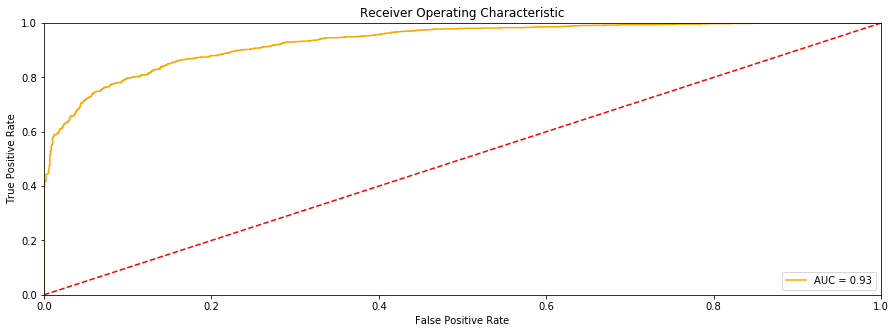

In [51]:
probabilities = classifier.predict_proba(X_test)

# Create a ROC curve to visualize true vs. false positive rates
# The higher the spike near the y-axis, the better the model
plt.figure(figsize=(15, 5))    
plot_auc(y_test, probabilities) 